<a href="https://colab.research.google.com/github/Naman1995jain/Retain-customers-perdition-/blob/main/Retail_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
DATA_PATH = "/content/DS_Test_Ecofy.docx-EmbeddedFile.xlsm - Customer-Churn.csv"  # <- set this
df = pd.read_csv(DATA_PATH)


In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Analyze the distribution of the target variable 'Churn' using a count plot and explore the relationship between 'Churn' and categorical features by creating stacked bar plots.

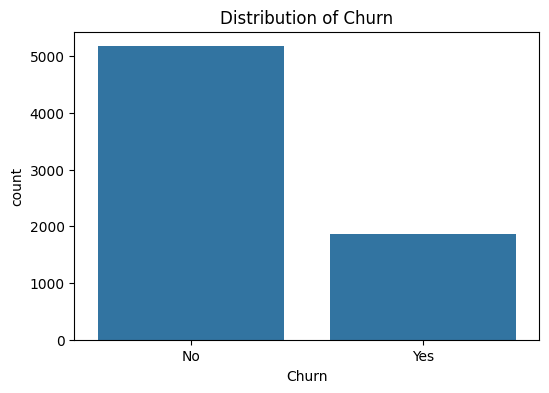

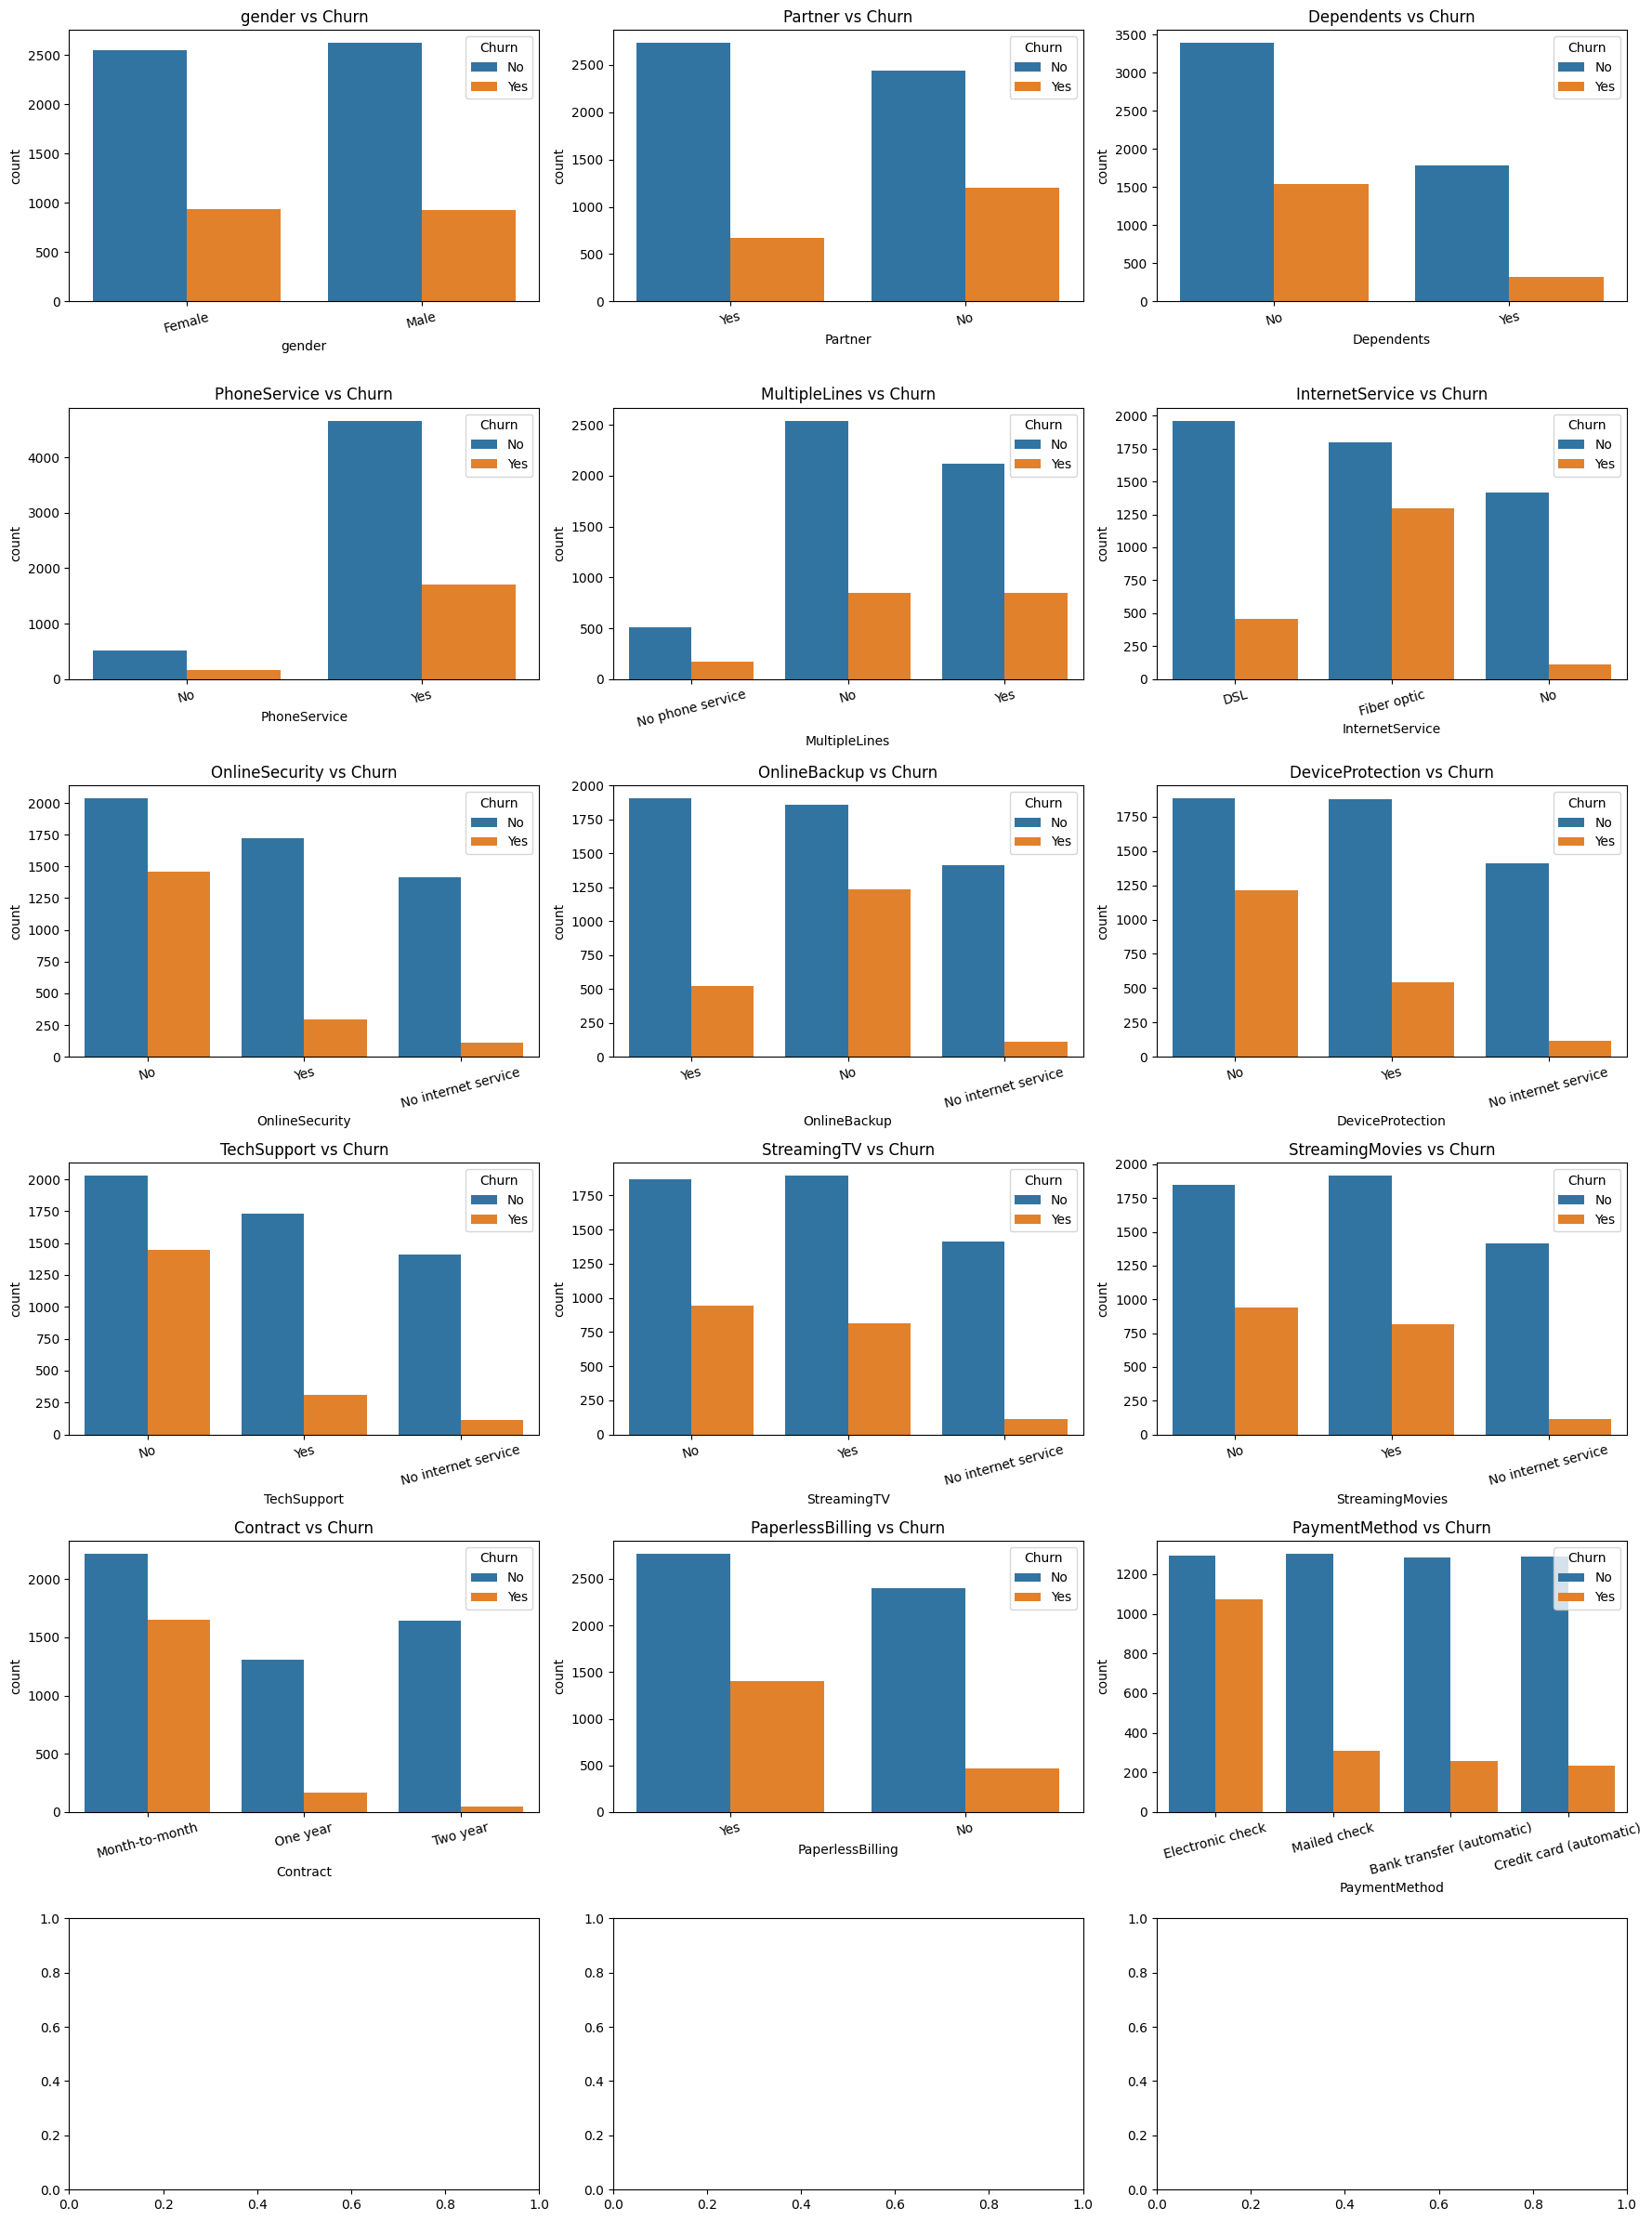

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Analyze the distribution of the target variable 'Churn'
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df)
plt.title('Distribution of Churn')
plt.show()

# 2. Explore the relationship between 'Churn' and categorical features
categorical_features = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                        'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                        'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
                        'PaperlessBilling', 'PaymentMethod']

fig, axes = plt.subplots(nrows=len(categorical_features)//3 + 1, ncols=3, figsize=(18, 4 * (len(categorical_features)//3 + 1)))
axes = axes.flatten()

for i, col in enumerate(categorical_features):
    sns.countplot(x=col, hue='Churn', data=df, ax=axes[i])
    axes[i].set_title(f'{col} vs Churn')
    axes[i].tick_params(axis='x', rotation=15)

plt.tight_layout()
plt.show()

In [ ]:
%pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.9/395.9 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 27.9 MB/s eta 0:00:00


# **imports all necessary Python libraries for data processing, machine learning, hyperparameter tuning, model evaluation**

In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, average_precision_score, precision_recall_curve, confusion_matrix, classification_report
from sklearn.calibration import calibration_curve # Import calibration_curve
import xgboost as xgb
import optuna
import joblib
import shap
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Set random seed for reproducibility
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

In [ ]:
TARGET = "Churn"  # Expecting values like 'Yes'/'No' or 1/0

In [ ]:
df = pd.read_csv(DATA_PATH)
print("Rows, cols:", df.shape)
print(df.head())

Rows, cols: (7043, 21)
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovi

 **data cleaning to ensure the dataset is ready for analysis. It converts TotalCharges to numeric (handling non-numeric values), normalizes the Churn target to 0/1, and drops irrelevant columns like customerID. A check for unique target values is added to handle unexpected formats. This step ensures data consistency and prepares the dataset for feature engineering and modeling.**

In [ ]:
# Quick cleaning
# Convert TotalCharges to numeric
if 'TotalCharges' in df.columns:
    df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Normalize target to 0/1
print("Unique values in Churn:", df[TARGET].unique())
if df[TARGET].dtype == object:
    df[TARGET] = df[TARGET].str.strip().map({'Yes': 1, 'No': 0}).fillna(df[TARGET])  # Preserve original if mapping fails
    if df[TARGET].isnull().any():
        print("Warning: Some Churn values could not be mapped to 0/1")

# Drop customerID if present
if 'customerID' in df.columns:
    df = df.drop(columns=['customerID'])

Unique values in Churn: ['No' 'Yes']


**Exploratory Data Analysis**

In [ ]:
print(df[TARGET].value_counts(normalize=True))
print(df.isnull().sum())


Churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


# Feature Engineering

**creates new features to improve model performance. It computes num_services (count of active services) and tenure_bucket (binned tenure values). Standardizing service column values ensures consistency, and the tenure_bucket feature captures non-linear effects of tenure**

In [ ]:
# List of service-related columns
service_cols = [
    'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'
]
service_cols = [c for c in service_cols if c in df.columns]

# Standardize service column values
for col in service_cols:
    df[col] = df[col].str.lower().replace({'yes': 'yes', 'no': 'no', 'no phone service': 'no', 'no internet service': 'no'})

# Create num_services feature
if service_cols:
    df['num_services'] = df[service_cols].apply(lambda row: sum(row.fillna('no').str.startswith('yes')), axis=1)

# Create tenure_bucket feature
if 'tenure' in df.columns:
    df['tenure_bucket'] = pd.cut(df['tenure'], bins=[-1, 1, 12, 24, 48, 72, 999], labels=['<1', '1-12', '13-24', '25-48', '49-72', '72+'])

# Feature Selection and Train-Test Split

**Numeric and categorical columns are identified, excluding the target and redundant features. A stratified split ensures the target’s class distribution is preserved in both sets, which is critical for imbalanced datasets like churn prediction.**

In [ ]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
num_cols = [c for c in num_cols if c != TARGET]
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
cat_cols = [c for c in cat_cols if c != TARGET]

print("Numerical features:", num_cols)
print("Categorical features:", cat_cols)

# Train-test split (stratified)
X = df.drop(columns=[TARGET])
y = df[TARGET].astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=RANDOM_SEED)

Numerical features: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'num_services']
Categorical features: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'tenure_bucket']


# Preprocessing Pipeline

**Numeric features are imputed with the median and scaled, while categorical features are imputed with the most frequent value and one-hot encoded. An ordinal encoder is added for tenure_bucket to handle its ordered nature. The pipeline ensures consistent preprocessing for training and inference.**

In [ ]:
# Preprocessing pipeline
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Handle ordinal features like tenure_bucket
ordinal_cols = ['tenure_bucket'] if 'tenure_bucket' in cat_cols else []
nominal_cols = [c for c in cat_cols if c not in ordinal_cols]

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, num_cols),
    ('cat', categorical_transformer, nominal_cols),
    ('ord', Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('ordinal', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
    ]), ordinal_cols)
], remainder='drop')

# Baseline Model (Logistic Regression)

**trains and evaluates a baseline logistic regression model with balanced class weights to handle churn’s class imbalance. It computes ROC-AUC and PR-AUC to assess performance. A simple baseline provides a benchmark for comparing more complex models like XGBoost.**

In [ ]:
# Baseline: Logistic Regression
baseline = Pipeline(steps=[
    ('preproc', preprocessor),
    ('clf', LogisticRegression(max_iter=1000, class_weight='balanced', random_state=RANDOM_SEED))
])

baseline.fit(X_train, y_train)
y_pred_proba = baseline.predict_proba(X_test)[:, 1]
print("Baseline ROC-AUC:", roc_auc_score(y_test, y_pred_proba))
print("Baseline PR-AUC:", average_precision_score(y_test, y_pred_proba))

Baseline ROC-AUC: 0.8470794905577514
Baseline PR-AUC: 0.6699140791475463


# XGBoost Model with Hyperparameter Tuning

**This cell defines an Optuna objective function to tune XGBoost hyperparameters, optimizing for ROC-AUC using cross-validation. The tuning process searches for the best parameters to maximize performance, and the best parameters are printed. This step aims to build a stronger model than the baseline.**

In [ ]:
# XGBoost with Optuna hyperparameter tuning
def objective(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.4, 1.0),
        'alpha': trial.suggest_float('alpha', 0, 5),
        'lambda': trial.suggest_float('lambda', 0, 5),
        'random_state': RANDOM_SEED,
        'use_label_encoder': False,
        'eval_metric': 'logloss'
    }
    model = Pipeline(steps=[
        ('preproc', preprocessor),
        ('clf', xgb.XGBClassifier(**param, verbosity=0))
    ])
    cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=RANDOM_SEED)
    scores = cross_val_score(model, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=1)
    return scores.mean()

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50, show_progress_bar=True)
print("Best params:", study.best_params)

[I 2025-08-10 18:31:09,119] A new study created in memory with name: no-name-8b023611-c954-42a1-9a2d-de629de7c0d7


  0%|          | 0/50 [00:00<?, ?it/s]

[I 2025-08-10 18:31:20,210] Trial 0 finished with value: 0.8325873795983868 and parameters: {'n_estimators': 260, 'max_depth': 12, 'learning_rate': 0.049233490221772196, 'subsample': 0.6690662546067645, 'colsample_bytree': 0.6791500731025928, 'alpha': 1.3936792772332236, 'lambda': 4.836716076800628}. Best is trial 0 with value: 0.8325873795983868.
[I 2025-08-10 18:31:27,369] Trial 1 finished with value: 0.8234542576407883 and parameters: {'n_estimators': 984, 'max_depth': 10, 'learning_rate': 0.020447392000868585, 'subsample': 0.9705023785211859, 'colsample_bytree': 0.413625445401957, 'alpha': 0.27926254159729713, 'lambda': 3.6980096782677156}. Best is trial 0 with value: 0.8325873795983868.
[I 2025-08-10 18:31:33,695] Trial 2 finished with value: 0.8260337277901695 and parameters: {'n_estimators': 582, 'max_depth': 8, 'learning_rate': 0.04000930402005513, 'subsample': 0.9110130398783809, 'colsample_bytree': 0.8503741882470943, 'alpha': 2.616102264617674, 'lambda': 1.8129186579180423}.

# Train and Evaluate Final XGBoost Model

**trains the final XGBoost model using the best parameters from Optuna and evaluates it on the test set. It computes ROC-AUC, PR-AUC, and selects the optimal threshold based on the F1 score. A classification report provides detailed metrics (precision, recall, F1). This step finalizes the model and assesses its performance.**

In [ ]:
# Train final model with best params
best_params = study.best_params
final_model = Pipeline(steps=[
    ('preproc', preprocessor),
    ('clf', xgb.XGBClassifier(**best_params, use_label_encoder=False, eval_metric='logloss',
                              verbosity=0, random_state=RANDOM_SEED))
])
final_model.fit(X_train, y_train)
y_test_proba = final_model.predict_proba(X_test)[:, 1]

# Evaluate
print("Final ROC-AUC:", roc_auc_score(y_test, y_test_proba))
print("Final PR-AUC:", average_precision_score(y_test, y_test_proba))

# Threshold selection based on F1 score
precision, recall, thresholds = precision_recall_curve(y_test, y_test_proba)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-12)
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx] if best_idx < len(thresholds) else 0.5
print("Best threshold by F1:", best_threshold)
y_pred = (y_test_proba >= best_threshold).astype(int)
print(classification_report(y_test, y_pred))

Final ROC-AUC: 0.8482084269808056
Final PR-AUC: 0.6605754341099063
Best threshold by F1: 0.35703182
              precision    recall  f1-score   support

           0       0.89      0.81      0.85      1035
           1       0.58      0.73      0.65       374

    accuracy                           0.79      1409
   macro avg       0.73      0.77      0.75      1409
weighted avg       0.81      0.79      0.79      1409



# Visualizations

**A calibration curve checks how well predicted probabilities align with actual outcomes**

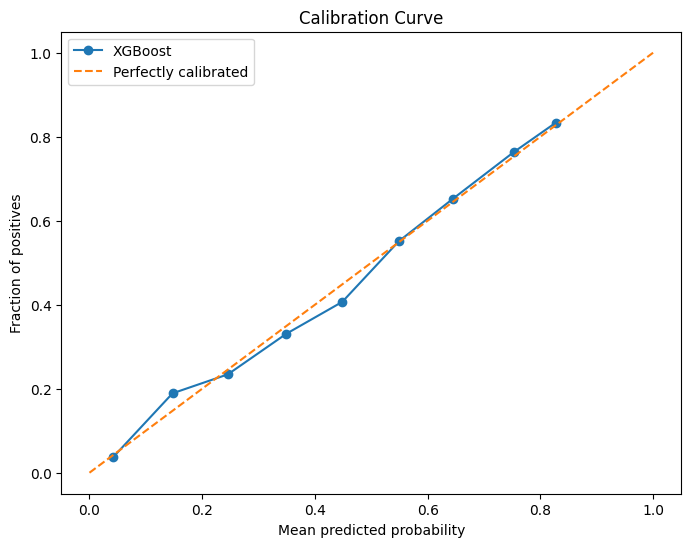

In [ ]:

prob_true, prob_pred = calibration_curve(y_test, y_test_proba, n_bins=10)

plt.figure(figsize=(8, 6))
plt.plot(prob_pred, prob_true, marker='o', label='XGBoost')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly calibrated')
plt.xlabel('Mean predicted probability')
plt.ylabel('Fraction of positives')
plt.title('Calibration Curve')
plt.legend()
plt.show() # Displays the plot

**a confusion matrix visualizes prediction errors**

Top-left (834): True Negatives (TN)
– The model correctly predicted 834 instances as "No Churn" (0).
Top-right (201): False Positives (FP)
– The model incorrectly predicted 201 instances as "Churn" (1) when they were actually "No Churn" (0).
Bottom-left (100): False Negatives (FN)
– The model incorrectly predicted 100 instances as "No Churn" (0) when they were actually "Churn" (1).
Bottom-right (274): True Positives (TP)
– The model correctly predicted 274 instances as "Churn" (1).

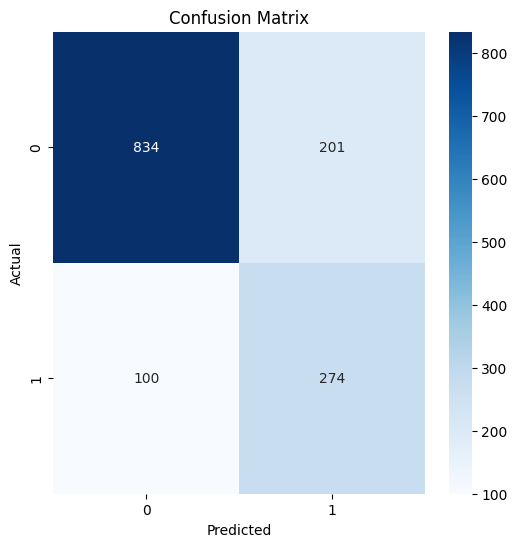

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show() # Displays the plot

**SHAP to explain the XGBoost model’s predictions by showing feature importance. Feature names are reconstructed after preprocessing to align with the transformed data. The SHAP summary plot is saved to a file for compatibility, providing insights into which features drive churn predictions.**

/tmp/ipython-input-2520383629.py:17: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, features=X_test_trans, feature_names=feature_names, show=True)


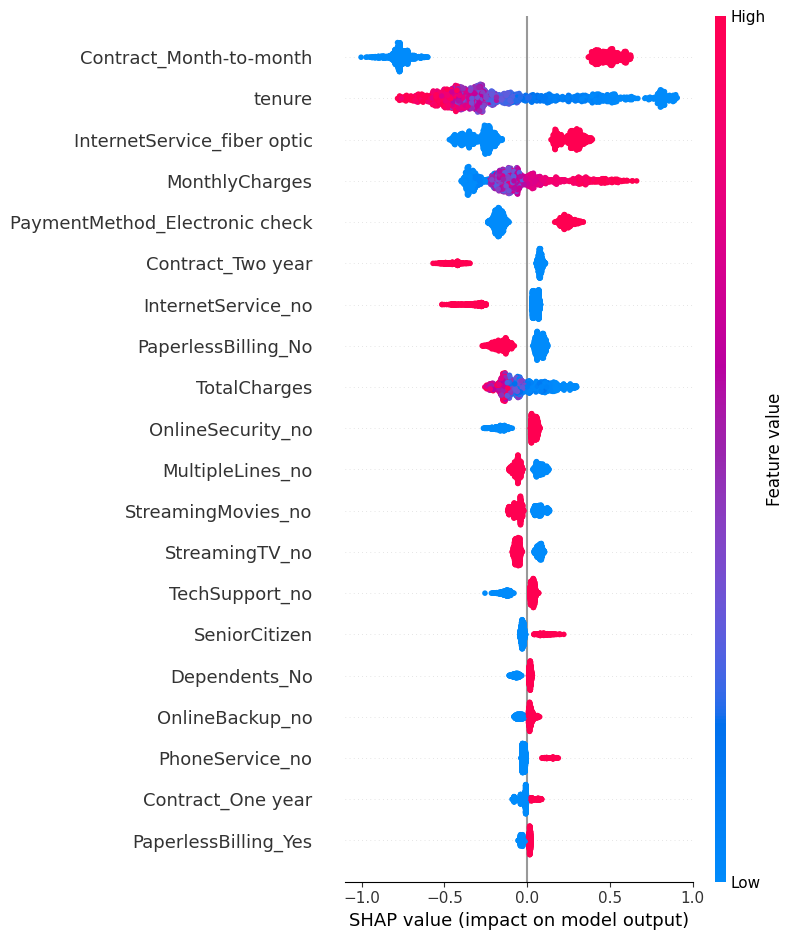

SHAP summary plot


In [ ]:
# SHAP explainability
preproc = final_model.named_steps['preproc']
X_test_trans = preproc.transform(X_test)

# Reconstruct feature names
feature_names = num_cols
oh = preproc.named_transformers_['cat'].named_steps['onehot']
if hasattr(oh, 'get_feature_names_out'):
    cat_feature_names = list(oh.get_feature_names_out(nominal_cols))
else:
    cat_feature_names = [f"{col}_{val}" for col in nominal_cols for val in oh.categories_[nominal_cols.index(col)]]
feature_names += cat_feature_names

# Compute SHAP values
explainer = shap.Explainer(final_model.named_steps['clf'])
shap_values = explainer(X_test_trans)
shap.summary_plot(shap_values, features=X_test_trans, feature_names=feature_names, show=True)
plt.show()
print("SHAP summary plot")

# Save Model

In [ ]:
# Save model
joblib.dump(final_model, "churn_xgb_pipeline.joblib")
print("Saved model to churn_xgb_pipeline.joblib")

# Inference function with input validation
def predict_customers(df_new, model_path="churn_xgb_pipeline.joblib", threshold=best_threshold):
    model = joblib.load(model_path)
    missing_cols = set(X_train.columns) - set(df_new.columns)
    if missing_cols:
        print(f"Warning: Missing columns in input data: {missing_cols}")
    proba = model.predict_proba(df_new)[:, 1]
    return pd.DataFrame({'score': proba, 'predict': (proba >= threshold).astype(int)})

Saved model to churn_xgb_pipeline.joblib


Model Testing

In [ ]:
import joblib
import pandas as pd
import numpy as np

# Load the trained pipeline model
model_path = "/content/churn_xgb_pipeline.joblib"
model = joblib.load(model_path)
print("✅ Model loaded successfully")

sample_data = {
    "gender": ["Female"],
    "SeniorCitizen": [0],
    "Partner": ["Yes"],
    "Dependents": ["No"],
    "tenure": [12],
    "PhoneService": ["Yes"],
    "MultipleLines": ["No"],
    "InternetService": ["Fiber optic"],
    "OnlineSecurity": ["No"],
    "OnlineBackup": ["Yes"],
    "DeviceProtection": ["No"],
    "TechSupport": ["No"],
    "StreamingTV": ["Yes"],
    "StreamingMovies": ["No"],
    "Contract": ["Month-to-month"],
    "PaperlessBilling": ["Yes"],
    "PaymentMethod": ["Electronic check"],
    "MonthlyCharges": [70.35],
    "TotalCharges": [845.5],
    "num_services": [3],
    "tenure_bucket": ["1-12"]
}
df_test = pd.DataFrame(sample_data)

# Make predictions
churn_prob = model.predict_proba(df_test)[:, 1]  # churn probability
churn_pred = model.predict(df_test)              # churn label (0/1)

# Add results to DataFrame
df_test["churn_probability"] = churn_prob
df_test["predicted_churn"] = churn_pred

# Show results
print(df_test)


✅ Model loaded successfully
   gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No      12          Yes   

  MultipleLines InternetService OnlineSecurity OnlineBackup  ...  \
0            No     Fiber optic             No          Yes  ...   

  StreamingMovies        Contract PaperlessBilling     PaymentMethod  \
0              No  Month-to-month              Yes  Electronic check   

  MonthlyCharges TotalCharges num_services  tenure_bucket  churn_probability  \
0          70.35        845.5            3           1-12            0.32303   

   predicted_churn  
0                0  

[1 rows x 23 columns]
